In [3]:
# Import necessary libraries
import torch
from huggingface_hub import hf_hub_download
from transformers import AutoProcessor, AutoModelForSpeechSeq2Seq

# Load the Whisper medium model and processor directly from Hugging Face
model_id = "openai/whisper-tiny"
print(f"Loading {model_id}...")

# Load the model and processor using Auto classes
processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForSpeechSeq2Seq.from_pretrained(model_id)

# Print the model architecture
print("\nModel Summary:")
print(model)

# Print some basic information about the model
print(f"\nNumber of parameters: {model.num_parameters():,}")
print(f"Device: {next(model.parameters()).device}")

Loading openai/whisper-medium...


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]


Model Summary:
WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(1024, 1024, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 1024)
      (layers): ModuleList(
        (0-23): 24 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=False)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_fea

In [4]:
# Exploring the WhisperConfig in detail
from transformers import WhisperConfig
import json
import inspect

# Create a sample config and get all attributes
config = WhisperConfig()

# Print all configuration parameters with their default values
print("=== WHISPER CONFIG PARAMETERS ===")
config_dict = config.to_dict()
for key, value in config_dict.items():
    print(f"{key}: {value}")

# Show what methods are available on the config
print("\n=== CONFIG METHODS ===")
config_methods = [method for method in dir(config) if not method.startswith('_') and callable(getattr(config, method))]
for method in config_methods:
    print(f"- {method}{inspect.signature(getattr(config, method))}")

# Explain the meaning of key config parameters
print("\n=== KEY CONFIG PARAMETERS EXPLAINED ===")
key_params = {
    "vocab_size": "Size of the tokenizer vocabulary",
    "d_model": "Dimension of the model's hidden representations",
    "encoder_layers": "Number of encoder layers in the Transformer",
    "encoder_attention_heads": "Number of attention heads in encoder's multi-head attention",
    "decoder_layers": "Number of decoder layers in the Transformer",
    "decoder_attention_heads": "Number of attention heads in decoder's multi-head attention",
    "max_source_positions": "Maximum sequence length for encoder input",
    "max_target_positions": "Maximum sequence length for decoder output",
    "activation_function": "Activation function used in the feed-forward networks",
    "num_mel_bins": "Number of mel features for audio processing",
    "dropout": "Dropout probability throughout the model",
    "attention_dropout": "Dropout probability for attention weights",
    "activation_dropout": "Dropout probability after activation in FFN"
}

for param, explanation in key_params.items():
    if param in config_dict:
        print(f"- {param}: {config_dict[param]}")
        print(f"  {explanation}")

# Show the differences between model sizes
print("\n=== MODEL SIZE CONFIGURATIONS ===")
model_sizes = {
    "tiny": {"d_model": 384, "encoder_layers": 4, "decoder_layers": 4},
    "base": {"d_model": 512, "encoder_layers": 6, "decoder_layers": 6},
    "small": {"d_model": 768, "encoder_layers": 12, "decoder_layers": 12},
    "medium": {"d_model": 1024, "encoder_layers": 24, "decoder_layers": 24},
    "large": {"d_model": 1280, "encoder_layers": 32, "decoder_layers": 32},
}

for size, params in model_sizes.items():
    approx_params = (params["d_model"] * params["d_model"] * 
                    (params["encoder_layers"] + params["decoder_layers"]) * 4) / 1000000
    print(f"- {size.capitalize()} model:")
    print(f"  d_model={params['d_model']}, encoder_layers={params['encoder_layers']}, " 
          f"decoder_layers={params['decoder_layers']}")
    print(f"  Approximate parameters: ~{approx_params:.1f}M")

# Examine how config affects model initialization
print("\n=== HOW CONFIG INFLUENCES MODEL ARCHITECTURE ===")
print("The config parameters determine:")
print("1. Size of embedding matrices (vocab_size × d_model)")
print("2. Number of encoder and decoder layers")
print("3. Size of feed-forward networks (d_model × 4 × d_model)")
print("4. Number of attention heads in multi-head attention")
print("5. Audio preprocessing parameters (sampling_rate, num_mel_bins)")

# Show how to customize a config
print("\n=== CUSTOMIZING CONFIG EXAMPLE ===")
print("""
# Create a customized Whisper config
custom_config = WhisperConfig(
    vocab_size=51865,              # Keep original vocabulary
    d_model=512,                   # Smaller dimension (like base model)
    encoder_layers=8,              # Custom number of layers
    decoder_layers=8,              # Custom number of layers
    encoder_attention_heads=8,     # Number of attention heads
    decoder_attention_heads=8,     # Number of attention heads
    dropout=0.2,                   # Higher dropout for regularization
    attention_dropout=0.1,         # Attention-specific dropout
    activation_function="gelu",    # Activation function
    max_source_positions=1500,     # Max length for audio input
    max_target_positions=448       # Max length for text output
)

# Initialize a model with custom config
from transformers import WhisperForConditionalGeneration
custom_model = WhisperForConditionalGeneration(custom_config)
""")

=== WHISPER CONFIG PARAMETERS ===
vocab_size: 51865
num_mel_bins: 80
d_model: 384
encoder_layers: 4
encoder_attention_heads: 6
decoder_layers: 4
decoder_attention_heads: 6
decoder_ffn_dim: 1536
encoder_ffn_dim: 1536
dropout: 0.0
attention_dropout: 0.0
activation_dropout: 0.0
activation_function: gelu
init_std: 0.02
encoder_layerdrop: 0.0
decoder_layerdrop: 0.0
use_cache: True
num_hidden_layers: 4
scale_embedding: False
max_source_positions: 1500
max_target_positions: 448
classifier_proj_size: 256
use_weighted_layer_sum: False
apply_spec_augment: False
mask_time_prob: 0.05
mask_time_length: 10
mask_time_min_masks: 2
mask_feature_prob: 0.0
mask_feature_length: 10
mask_feature_min_masks: 0
median_filter_width: 7
return_dict: True
output_hidden_states: False
output_attentions: False
torchscript: False
torch_dtype: None
use_bfloat16: False
tf_legacy_loss: False
pruned_heads: {}
tie_word_embeddings: True
chunk_size_feed_forward: 0
is_encoder_decoder: True
is_decoder: False
cross_attention_hi

In [6]:
# Examining Whisper components in detail
from transformers import AutoModel, WhisperModel

# Load the base model for comparison - use WhisperModel instead of AutoModel
try:
    base_model = WhisperModel.from_pretrained("openai/whisper-medium")
except Exception as e:
    print(f"Could not load base model: {e}")
    print("Continuing with processor exploration only...")

# Examine the processor in detail
print("=== PROCESSOR DETAILS ===")
print(f"Components: {list(processor.__dict__.keys())}")

# Feature extractor examination
print("\nFeature Extractor Properties:")
feature_extractor_props = [attr for attr in dir(processor.feature_extractor) 
                          if not attr.startswith('_') and not callable(getattr(processor.feature_extractor, attr))]
for prop in feature_extractor_props[:10]:  # Show first 10 properties
    value = getattr(processor.feature_extractor, prop)
    print(f"- {prop}: {value}")

print("\nHow audio is processed:")
print(f"Sampling rate: {processor.feature_extractor.sampling_rate} Hz")
print(f"Feature size: {processor.feature_extractor.feature_size}")
print(f"Hop length: {processor.feature_extractor.hop_length}")
print(f"Chunk length: {processor.feature_extractor.chunk_length} seconds")

# Tokenizer examination
print("\nTokenizer Details:")
print(f"Vocabulary size: {processor.tokenizer.vocab_size}")
print(f"Model max length: {processor.tokenizer.model_max_length}")
print(f"Special tokens: {processor.tokenizer.all_special_tokens}")

# Sample of vocabulary
print("\nSample tokens from vocabulary:")
sample_tokens = list(processor.tokenizer.get_vocab().items())[:10]
for token, id in sample_tokens:
    print(f"- '{token}': {id}")

# Compare model architectures - skip if base_model failed to load
print("\n=== MODEL COMPARISON ===")

# Check for the language modeling head (key difference)
print("\nKey structural difference:")
for name, module in model.named_children():
    if "lm_head" in name:
        print(f"- Found in WhisperForConditionalGeneration: {name} - {type(module)}")
        if hasattr(module, 'in_features') and hasattr(module, 'out_features'):
            print(f"  Shape: Input {module.in_features} → Output {module.out_features}")
        else:
            print(f"  Module properties: {dir(module)[:10]}")

# Show the generation methods
print("\nGeneration methods available:")
generation_methods = [method for method in dir(model) 
                     if "generate" in method and not method.startswith("_")]
for method in generation_methods:
    print(f"- {method}")

# Practical demonstration of prompt handling
print("\n=== PRACTICAL CAPABILITIES ===")
print("Special prompt capabilities for different languages and tasks:")

# Show available languages and tasks
print("\nAvailable languages in processor:")
if hasattr(processor, "tokenizer") and hasattr(processor.tokenizer, "additional_special_tokens"):
    language_tokens = [token for token in processor.tokenizer.additional_special_tokens 
                      if token.startswith("<|") and token.endswith("|>") and len(token) < 10]
    print(language_tokens[:10])  # Show first 10 language tokens

# Fix the prompt generation code
print("\nPrompt generation for different tasks:")
for task in ["transcribe", "translate"]:
    for language in ["english", "french", "japanese"]:
        try:
            # Handle potential errors in get_decoder_prompt_ids
            prompt_ids = processor.get_decoder_prompt_ids(language=language, task=task)
            if isinstance(prompt_ids, tuple):
                # If it returns a tuple, take the first element
                prompt_ids = prompt_ids[0] if prompt_ids else []
            prompt_tokens = processor.tokenizer.convert_ids_to_tokens(prompt_ids)
            print(f"- {language.capitalize()} {task}: {prompt_tokens}")
        except Exception as e:
            print(f"- Error with {language} {task}: {e}")

=== PROCESSOR DETAILS ===
Components: ['chat_template', 'feature_extractor', 'tokenizer', 'current_processor', '_in_target_context_manager']

Feature Extractor Properties:
- chunk_length: 30
- dither: 0.0
- feature_extractor_type: WhisperFeatureExtractor
- feature_size: 80
- hop_length: 160
- mel_filters: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.02486259 0.00199082 0.         ... 0.         0.         0.        ]
 [0.         0.02287177 0.00398164 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.00089752]
 [0.         0.         0.         ... 0.         0.         0.00044876]
 [0.         0.         0.         ... 0.         0.         0.        ]]
- model_input_names: ['input_features']
- n_fft: 400
- n_samples: 480000
- nb_max_frames: 3000

How audio is processed:
Sampling rate: 16000 Hz
Feature size: 80
Hop length: 160
Chunk length: 30 seconds

Tokenizer Details:
Vocabulary size: 50258
Mode

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

Loading ylacombe/expresso dataset...


train-00001-of-00012.parquet:  11%|#1        | 73.4M/655M [00:00<?, ?B/s]

train-00002-of-00012.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

train-00003-of-00012.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

train-00004-of-00012.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

train-00005-of-00012.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

train-00006-of-00012.parquet:   0%|          | 0.00/406M [00:00<?, ?B/s]

train-00007-of-00012.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00008-of-00012.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

train-00009-of-00012.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

train-00010-of-00012.parquet:   0%|          | 0.00/513M [00:00<?, ?B/s]

train-00011-of-00012.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11615 [00:00<?, ? examples/s]


Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'speaker_id', 'style', 'id'],
        num_rows: 11615
    })
})

Converting to DataFrame for analysis...

=== STYLE COLUMN ANALYSIS ===
Number of samples: 11615
Number of unique styles: 11

Sample of style values:
['whisper', 'laughing', 'happy', 'emphasis', 'sad']

Samples per style class:
     Style  Count
  confused   1520
enunciated   1520
     happy   1520
  laughing   1520
   default   1519
       sad   1519
   whisper   1518
  emphasis    800
essentials    160
   singing     11
  longform      8


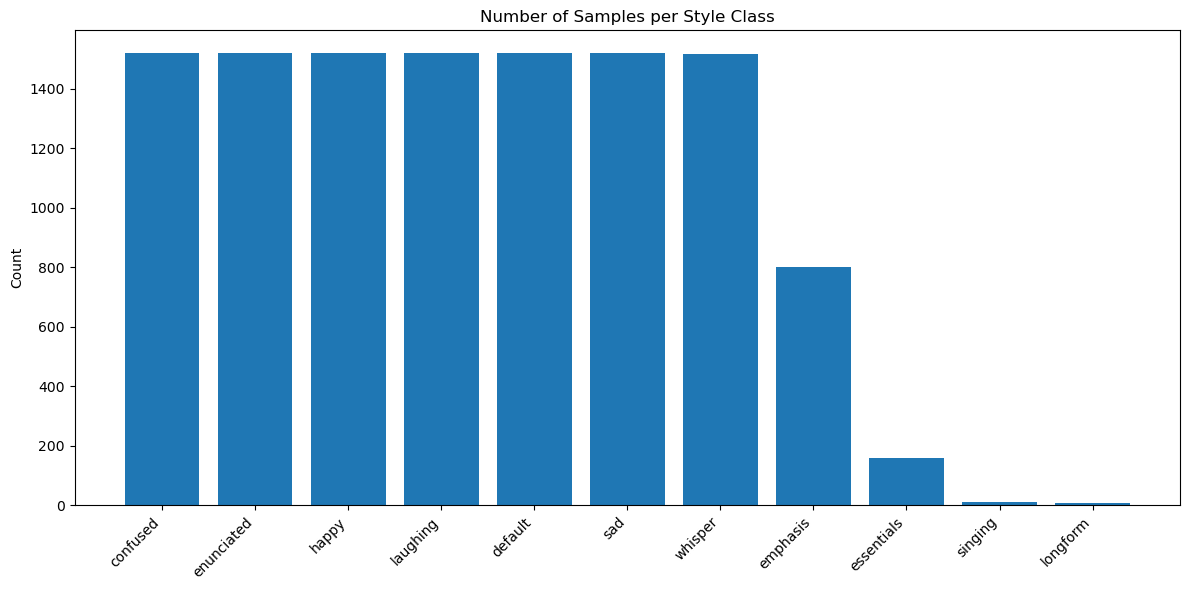

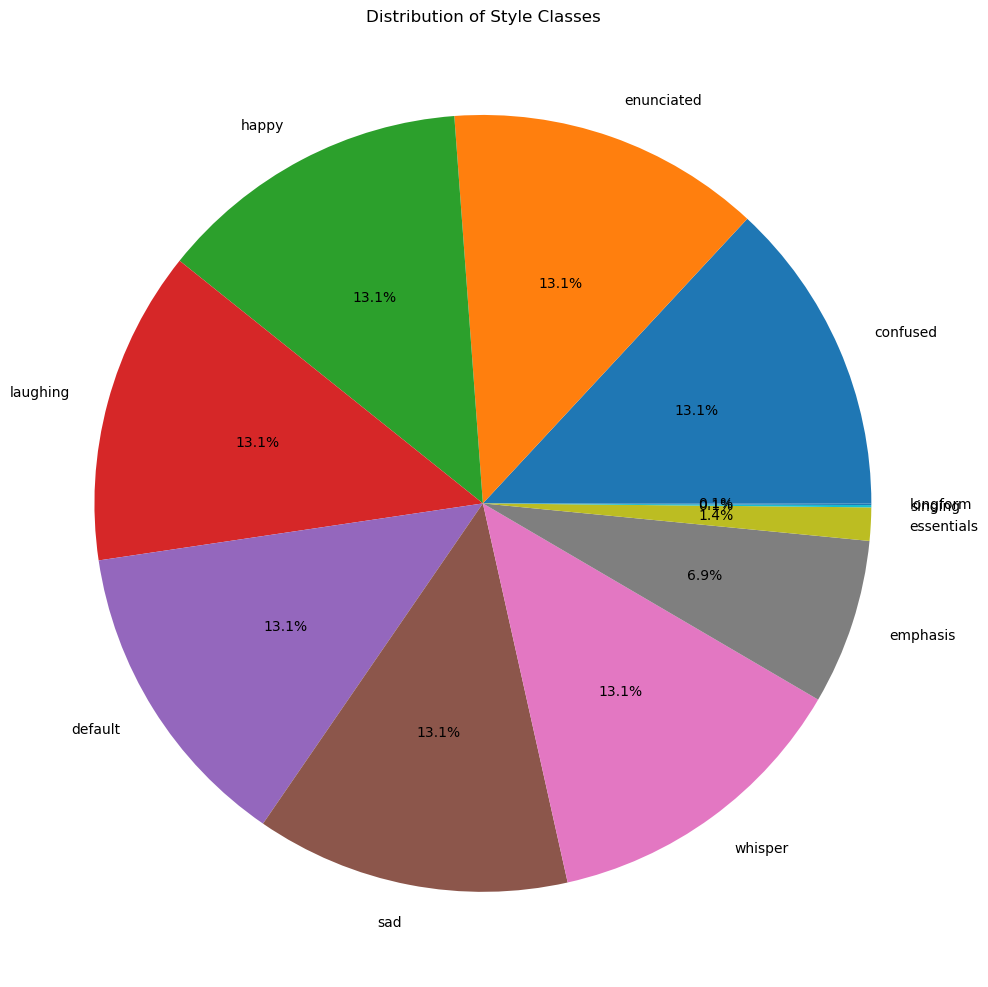


=== CLASS IMBALANCE ANALYSIS ===
Largest class: confused with 1520 samples
Smallest class: longform with 8 samples
Imbalance ratio (largest/smallest): 190.00

=== ADDITIONAL STATISTICS ===
Mean samples per class: 1055.91
Median samples per class: 1519.00
Standard deviation: 675.43

Missing style values: 0


In [11]:
# Import necessary libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Expresso dataset from Hugging Face
print("Loading ylacombe/expresso dataset...")
dataset = load_dataset("ylacombe/expresso")

# Print basic dataset information
print(f"\nDataset structure:")
print(dataset)

# Convert to pandas DataFrame for easier analysis
print("\nConverting to DataFrame for analysis...")
df = pd.DataFrame(dataset['train'])

# Check if 'style' column exists
if 'style' not in df.columns:
    print("'style' column not found. Available columns:")
    print(df.columns.tolist())
else:
    # Basic information about the style column
    print("\n=== STYLE COLUMN ANALYSIS ===")
    print(f"Number of samples: {len(df)}")
    print(f"Number of unique styles: {df['style'].nunique()}")
    print("\nSample of style values:")
    print(df['style'].sample(5).tolist())
    
    # Count samples per style class
    style_counts = df['style'].value_counts().reset_index()
    style_counts.columns = ['Style', 'Count']
    
    # Display counts in a table
    print("\nSamples per style class:")
    print(style_counts.to_string(index=False))
    
    # Calculate percentage of total for each style
    total_samples = len(df)
    style_counts['Percentage'] = (style_counts['Count'] / total_samples * 100).round(2)
    
    # Sort by count for better visualization
    style_counts = style_counts.sort_values('Count', ascending=False)
    
    # Create bar chart of class distribution
    plt.figure(figsize=(12, 6))
    plt.bar(style_counts['Style'], style_counts['Count'])
    plt.title('Number of Samples per Style Class')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Create pie chart showing distribution
    plt.figure(figsize=(10, 10))
    plt.pie(style_counts['Count'], labels=style_counts['Style'], autopct='%1.1f%%')
    plt.title('Distribution of Style Classes')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Check for class imbalance
    print("\n=== CLASS IMBALANCE ANALYSIS ===")
    max_count = style_counts['Count'].max()
    min_count = style_counts['Count'].min()
    imbalance_ratio = max_count / min_count
    print(f"Largest class: {style_counts.iloc[0]['Style']} with {max_count} samples")
    print(f"Smallest class: {style_counts.iloc[-1]['Style']} with {min_count} samples")
    print(f"Imbalance ratio (largest/smallest): {imbalance_ratio:.2f}")
    
    # Additional statistics
    print("\n=== ADDITIONAL STATISTICS ===")
    print(f"Mean samples per class: {style_counts['Count'].mean():.2f}")
    print(f"Median samples per class: {style_counts['Count'].median():.2f}")
    print(f"Standard deviation: {style_counts['Count'].std():.2f}")
    
    # Check if there are any missing values in the style column
    missing_styles = df['style'].isna().sum()
    print(f"\nMissing style values: {missing_styles}")